<p style="text-align: center;font-size: 40pt">Outliers</p>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial
from IPython.display import HTML

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Data association](2-lesson_association.ipynb)

Objectives of this lesson:
- explain what is an outlier filter
- give the different types of outlier filters

Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\DeclareMathOperator*{\argmin}{arg\,min}$
$\DeclareMathOperator{\error}{error}$
$\DeclareMathOperator*{\match}{match}$
$\DeclareMathOperator{\distance}{d}$
$\DeclareMathOperator{\outlier}{outlier}$
$\DeclareMathOperator{\weight}{w}$
$\DeclareMathOperator{\datafilter}{datafilter}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\shape}[2][]{{}^{#1}\mathcal{#2}}$
$\newcommand{\matches}[1]{\mathcal{#1}}$
$\newcommand{\transformation}[3][T]{{}_{#2}^{#3}\mat{#1}}$
$\newcommand{\weights}[1]{\mathcal{#1}}$
$\newcommand{\textcomma}{\quad,}$
$\newcommand{\textdot}{\quad.}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
----

# Introduction
While <tt>data filters</tt> are used to reduce the impact of sensor noise,  <tt>outlier filters</tt> are used to reduce the impact of erroneous matches mainly caused by partial observations, dynamic elements and poor environment information extraction. 
Match quality can be evaluated based on feature pairs, descriptor pairs or even both together, independent of the match distance used (i.e., based on features or on descriptors).

# Rejection or hard outlier filters
When using descriptors, it is possible to apply an <tt>outlier filter</tt>.  
Regarding Scale Invariant Feature Transform (SIFT) descriptors, the original method proposed was to reject all matches where the distance ratio with the second best match is higher than 80 % [[Lowe, 2004]](https://link.springer.com/article/10.1023%2FB%3AVISI.0000029664.99615.94). 
In [[Stewart et al., 2003]](https://ieeexplore.ieee.org/document/1242341), all matches under 95 % confidence based on $\chi^2$ uncertainty bound are rejected.

In the case where outliers are filtered based on features, rejection techniques mostly use a threshold based on Euclidean distance, the main difference is how thresholds are chosen.
A naive approach is to use a maximal distance between points [[Segal et al., 2009]](http://www.roboticsproceedings.org/rss05/p21.html). 
This technique is sometimes hidden by using a fixed radius directly in the matching function.
Likewise, surface orientation differences between paired points can be limited to a fixed value [\[Pulli, 1999](https://ieeexplore.ieee.org/document/805346), [Zhang, 1994\]](https://link.springer.com/article/10.1007/BF01427149) or an adaptive one based on the median [[Diebel et al., 2004]](https://ieeexplore.ieee.org/document/1389948).
Adaptive methods can be based on the mean distance between points and their Standard Deviation (STD) [\[Druon et al., 2006](https://ieeexplore.ieee.org/document/4097937), [Zhang, 1994\]](https://link.springer.com/article/10.1007/BF01427149), STD only [[Masuda et al., 1996]](https://ieeexplore.ieee.org/document/546150), the quartile position (a.k.a trimmed) [\[Chetverikov et al., 2002](https://ieeexplore.ieee.org/document/1047997), [Censi, 2008](https://ieeexplore.ieee.org/document/4543181), [Armesto et al., 2010\]](https://ieeexplore.ieee.org/document/5509371) and the median [[Diebel et al., 2004]](https://ieeexplore.ieee.org/document/1389948) of the distances of all paired points. 
In an iterative system for data association, [Pulli [1999]](https://ieeexplore.ieee.org/document/805346) proposed to  manually reduce the threshold at each iteration based on the convergence of the system. 
An automatic extension to this approach is presented in [[Pomerleau et al., 2010]](https://link.springer.com/chapter/10.1007/978-3-642-13408-1_21). 
A different type of <tt>outlier filter</tt> evaluates whether there are multiple matches from the <tt>reading</tt> to the <tt>reference</tt> and keeps only the match with the smallest distance [[Zinsser et al., 2003]](https://ieeexplore.ieee.org/document/1246775).

# Weighting or soft outlier filters

All the methods above utilize *hard* assignment to identify outliers. 
This means that, beyond a certain threshold, the feature pair (i.e., tuple) is  discarded prior to being considered by the minimization procedure. 
Assignments can also be made *soft* by using a weighting function promoting inliers during the minimization. 
Those weighting functions can consist of the ratio of mean distance over each paired distances [[Pan et al., 2010]](https://ieeexplore.ieee.org/document/5476132) or function such as Gaussian [[Godin et al., 1994]](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/2350/1/Three-dimensional-registration-using-range-and-intensity-information/10.1117/12.189139.short) or Cauchy (a.k.a. Lorentzian) [[Bosse and Zlot, 2009b]](https://ieeexplore.ieee.org/document/5152851). 
Mix between *soft* and *hard* assignment are also used like one minus the ratio of the tuple distance divided by a maximum distance (with a saturation to zero when the tuple distance is over the maximum distance) [[Diebel et al., 2004]](https://ieeexplore.ieee.org/document/1389948) or directly using the bisquare (a.k.a Tukey or Beaton-Tukey) function [\[Masuda, 2001](https://ieeexplore.ieee.org/document/924447), [Stewart et al., 2003\]](https://ieeexplore.ieee.org/document/1242341). 
All those techniques use only the feature information to weight outliers.
One example of mixing features and descriptors proximity can be founded in the work of [Godin et al. [1994]](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/2350/1/Three-dimensional-registration-using-range-and-intensity-information/10.1117/12.189139.short), where the total weight is computed by multiplying the feature distance by a reflectance similarity function.

# Robust statistics

We have seen in the last part of the [lesson Descriptive statistics](../uncertainty/1-lesson_descriptive_statistics.ipynb) that the distribution of distances is not symmetrical and its mean is heavily influenced by outliers.
Dealing with outliers during a minimization process falls into the field of robust statistics. 
A suite of tools is proposed to robustly estimate the position (i.e., robust variant of the mean) and the scale (i.e., robust variant of the STD). 
For the scale estimation, some possibilities were found: Huber estimate, Median Absolute Deviation (MAD), interquartile range, Tukey estimator, trimmed estimator and Winsorised estimator. 

The utilization of weights for a minimization process is based on a class of functions called M-estimators.
Here is a list of M-estimators found in the robust regression literature: Least-squares (a.k.a $L_2$) (not robust but is commonly used), Least-absolute (a.k.a $L_1$), $L_1 - L_2$, Least-power (a.k.a $L_p$), Fair, Huber, Geman-McClure, Logistic, Median, Talworth, Welsch, Cauchy (a.k.a Lorentzian). 
A category of M-estimator, called redescending M-estimators, have a saturation point to reject gross outliers. 
This category is equivalent to a mix of soft and hard weights.
Those functions are called: Hampel, bisquare and Andrews.
Note that only the Cauchy [[Bosse and Zlot, 2009b]](https://ieeexplore.ieee.org/document/5152851) and the bisquare [\[Masuda, 2001](https://ieeexplore.ieee.org/document/924447), [Stewart et al., 2003\]](https://ieeexplore.ieee.org/document/1242341) functions were found in data-association papers.

## Example rejection

Outlier filters can be defined as assigning a weight to each pair, such that

$$\weights{W}=\outlier(\matches{M})=\left\{\weight(\point{p}, \point{q}): \forall (\point{p}, \point{q})\in\matches{M}\right\} 
\textdot
$$

Outlier rejection based on a fixed threshold $\tau$ on the distance between the points can then be written as

$$
    \weight(\point{p}, \point{q}) = \left\{
        \begin{array}{rl}
            0 &\mbox{ if $\distance(\point{p} - \point{q}) > \tau$,} \\
          	1 &\mbox{ otherwise.}
        \end{array}
    \right.
$$

In the case of a hard outlier filter, such as this one, one can equivalently define a new set of matches $\matches{M}'$ with only the pairs with a weight of 1.
The code cell below shows an example of a fixed threshold implementation. 

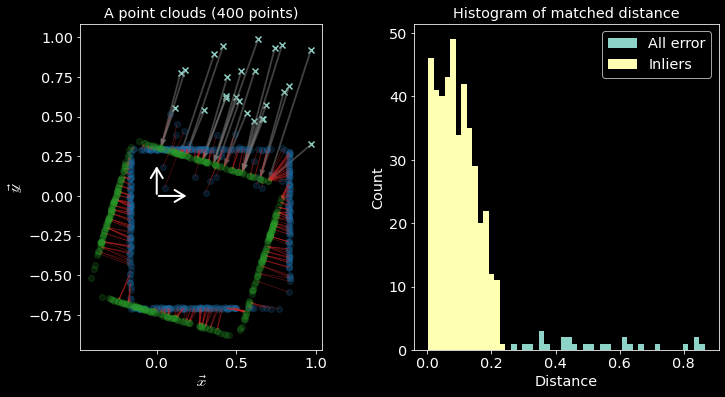

In [57]:
# Generate two point clouds
nb_pts = 400
P = build_room([1.2, 2.], [2.2, 1.5], angle=-0, nb_pts=nb_pts)
Q = build_room([1.8, 2.], [2.8, 2.2], angle=-0.3, nb_pts=nb_pts)

# Generate outlier points
nb_outliers = 50
outlier = np.vstack([np.random.uniform(size=nb_outliers), 
                     np.random.uniform(size=nb_outliers), 
                     np.ones(nb_outliers)
                    ])

# add outliers to our reading point cloud
P = np.hstack([P, outlier])

# compute the match
tree = spatial.KDTree(Q.T)
dist, match = tree.query(P.T, k=1)

# compute the error
errors = Q[:,match] - P
dist_err = np.linalg.norm(errors, axis=0)

# outlier rejection (keep only distance under tau)
tau = 0.25
mask = (dist_err < tau)

# recompute the error
new_errors = errors[:,mask]
new_dist_err = np.linalg.norm(new_errors, axis=0)

# -----------------------
# plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax=axs[0]
ax.set_title("A point clouds (%i points)" % nb_pts);
ax.scatter(P[0,~mask], P[1,~mask], marker='x')
ax.quiver(P[0,~mask], P[1,~mask], errors[0,~mask], errors[1,~mask], 
                      color="grey", alpha=.5,
                      angles='xy', scale_units='xy', scale=1.)
draw_point_clouds(ax, P=P[:,mask], Q=Q, errors=new_errors)
          
ax=axs[1]
ax.set_title("Histogram of matched distance");
n, bins, patches = ax.hist(dist_err, bins=50, label="All error");
ax.hist(new_dist_err, bins=bins, label="Inliers");
ax.legend()
ax.set_xlabel("Distance")
ax.set_ylabel("Count");

## Example weighting

Instead of removing pairs with a weight equal to zero, we can have a continous function that penalize (i.e., put lower weights) pairs of points that are too far.
One of the typical robust cost function is named Welsch, which is simply a Gaussian function used for weighting.
Outlier weighting based on a scale parameter $k$ and on the distance between the points can then be written as

$$
    \weight(\point{p}, \point{q}) = \exp \left( -\frac{\distance(\point{p} - \point{q})}{k} \right)
    \textdot
$$

In the case of a soft outlier filter, such as this one, the error minimizer needs to optimize over the weighted least-square error instead of simply the least-square error.
The code cell below shows an example of a weight computation relying on a Gaussian function to minimize the impact of outliers in the minimization.
To visually understand, the size of each point in P (in blue) represents their weights in the minimization process. 
The larger they are, the more the alignment error they generate will be taken in consideration during the minimization process.

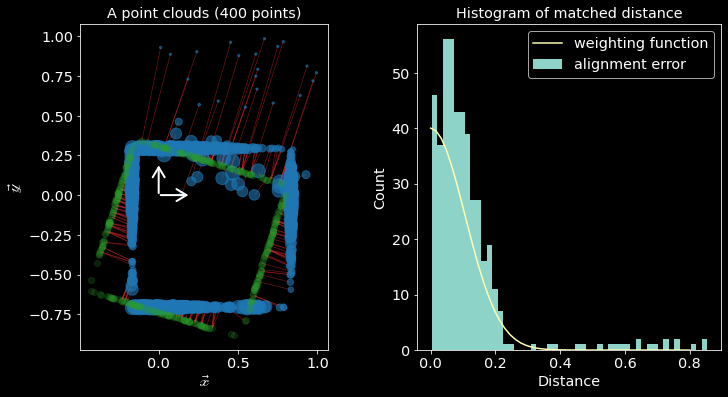

In [56]:
# Generate two point clouds
nb_pts = 400
P = build_room([1.2, 2.], [2.2, 1.5], angle=-0, nb_pts=nb_pts)
Q = build_room([1.8, 2.], [2.8, 2.2], angle=-0.3, nb_pts=nb_pts)

# Generate outlier points
nb_outliers = 50
outlier = np.vstack([np.random.uniform(size=nb_outliers), 
                     np.random.uniform(size=nb_outliers), 
                     np.ones(nb_outliers)
                    ])

# add outliers to our reading point cloud
P = np.hstack([P, outlier])

# compute the match
tree = spatial.KDTree(Q.T)
dist, match = tree.query(P.T, k=1)

# compute the error
errors = Q[:,match] - P
dist_err = np.linalg.norm(errors, axis=0)

# compute the weights
k = 0.15
weight = np.exp(-(dist_err/k)**2.)

# -----------------------
# plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax=axs[0]
ax.set_title("A point clouds (%i points)" % nb_pts);
ax.quiver(P[0], P[1], errors[0], errors[1], 
                      color="tab:red", alpha=.5,
                      angles='xy', scale_units='xy', scale=1.)
ax.scatter(P[0], P[1], color="tab:blue", s=200.*weight+5, alpha=0.6)
draw_point_clouds(ax, Q=Q)

          
ax=axs[1]
x = np.linspace(0., 0.8, 50)
gaussian = 40.*np.exp(-(x/k)**2.) # rescale for visibility
ax.set_title("Histogram of matched distance");
n, bins, patches = ax.hist(dist_err, bins=50, label="alignment error");
ax.plot(x, gaussian, label="weighting function")
ax.legend()
ax.set_xlabel("Distance")
ax.set_ylabel("Count");

## Other examples

We have a detailled list of more than 20 outlier filters with graphs to illustrate all of them in [that page](https://github.com/ethz-asl/libpointmatcher/blob/master/doc/OutlierFiltersFamilies.md).

# Conclusion
You should do the following activities to enhance your understanding of the concepts viewed in this lesson:
- modify the markdown by adding your own notes using `> my notes`; and
- complete the tables [Symbol definitions](#Symbol-definitions) and [Glossary](#Glossary) and add your own definitions.

Parallel lesson: 
- [Processing point clouds](2-lesson_processing.ipynb)

Next lesson:
- [Error minimization](4-lesson_error_minimization.ipynb)

## Symbol definitions

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Symbol &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Definition                    |
|:--------------------------------:|:-----------------------------------------------------:|
| $\outlier(\matches{M})$          | Set of weights associated to the matches $\matches{M}$ |
| $\distance(\point{p}, \point{q})$| Distance between points $\point{p}$ and $\point{q}$   |
| $\weight(\point{p}, \point{q})$  | Weight of the match between points $\point{p}$ and $\point{q}$  |

## Glossary

| English   | Français   | Definition |
|-----------|------------|------------|
|           |            |            |